# Optimization of parameters in genetic algorithms

This notebook gathers the results for the parameter optimization made on the mono-objective genetic algorithms, considering a binary threshold of 30.

### Brief explanation

With the previous exploration of parameters, we were able to determine which values resulted in better performances. There was obviously not a unique configuration yielding better results so, for the optimization run, we still allowed some variation. We basically assigned different probabilities of appearence to each of the parameters' values. The parameters, their possible values and their associated probabilities are:

- **Estimator**: SVM1 (c=2), SVM2 (c=10), SVM3 (c=50) ------------------------------- Probabilities: 4/9, 3/9, 2/9
- **Annihilation**: AN1 (0.2), AN2 (0.3), AN3 (0.4) ----------------------------------------- Probabilities: 4/9, 4/9, 1/9
- **Elite**: EL1 (0.2), EL2 (0.3), EL3 (0.4) ----------------------------------------------------- Probabilities: 4/8, 1/8, 3/8
- **Mutation rate**: MR1 (0.05), MR2 (0.1), MR3 (0.15) ---------------------------------- Probabilities: 4/9, 4/9, 1/9
- **Selection**: SE1 (tournament 2-1) , SE2 (tournament 5-2), SE3 (roulette) ------ Probabilities: 5/9, 2/9, 2/9

For each cluster, we run 20 models whose parameters are selected according to these probabilities. The best is chosen according to accuracy and f1 score in the test dataset.

### Import the packages

We import the packages that will be needed. In this case, everything is already contained in the gatools.py file, that loads submodules of PyWin module.

In [1]:
import matplotlib
import seaborn
import sys
sys.path.insert(0,'../../Tools')
from orderedlist import *
from gatools import *
bi = Binarization()
mo = Models()

In [2]:
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)

### Preparation of results

#### General stuff

In [3]:
qual_clusters = bi.get_binary(pandas.read_csv('../../Data/CoarseGrained/Y_clusters_quan_30_9.csv'),30)

In [4]:
features = pandas.read_csv('./Optimization_mono_30/optimization_best_features.csv')
features_all = pandas.read_csv('./Optimization_mono_30/optimization_features.csv')
train = pandas.read_csv('./Optimization_mono_30/optimization_best_train.csv')
test = pandas.read_csv('./Optimization_mono_30/optimization_best_test.csv')

In [5]:
tasks_clusters = ['_'.join([i.split('_')[-2],i.split('_')[-1]]) for i in list(features['Model'])]

#### Metrics

In [6]:
pct_clusters = round(numpy.divide(numpy.sum(qual_clusters),qual_clusters.shape[0]).to_frame().transpose(),3)
pct_clusters = pct_clusters.add_prefix('Region=')
pct_clusters.index=['percentage_positive']

In [7]:
metrics_clusters = pandas.DataFrame()
for task in tasks_clusters:
    temp_metrics = mo.evaluate_metrics(train,test,task)
    try: metrics_clusters = pandas.concat([metrics_clusters,temp_metrics],axis=1)
    except: metrics_clusters = temp_metrics

#### Features

In [8]:
features_clusters = pandas.DataFrame()
for task in tasks_clusters:
    temp_features = mo.evaluate_features(features,features_all,task)
    try: features_clusters = pandas.concat([features_clusters,temp_features],axis=0)
    except: features_clusters = temp_features

In [9]:
map_clusters = pandas.DataFrame()
for task in clusters_list:
    try: 
        temp_map = mo.map_features(features_all,features_list,task)
        try: map_clusters = pandas.concat([map_clusters,temp_map],axis=0)
        except: map_clusters = temp_map
    except: pass

### Results

Down below we show the **sorted lobes according to accuracy and f1 score**. In the second table, only test information is given (those clusters appearing at the top are the ones with better overall models).

In [10]:
metrics_pct_clusters = pandas.concat([metrics_clusters,pct_clusters],join='inner')
metrics_pct_clusters

,Region=cluster_4,Region=cluster_3,Region=cluster_7,Region=cluster_6,Region=cluster_8,Region=cluster_2,Region=cluster_5,Region=cluster_1,Region=cluster_0
accuracy_test,0.803+/-0.025,0.901+/-0.037,0.794+/-0.037,0.853+/-0.041,0.691+/-0.041,0.772+/-0.047,0.865+/-0.036,0.759+/-0.045,0.839+/-0.036
accuracy_train,0.906+/-0.009,0.953+/-0.010,0.847+/-0.011,0.977+/-0.006,0.712+/-0.015,0.865+/-0.012,0.965+/-0.006,0.838+/-0.012,0.942+/-0.012
f1_test,0.722+/-0.037,0.691+/-0.106,0.715+/-0.055,0.670+/-0.079,0.717+/-0.034,0.652+/-0.054,0.594+/-0.103,0.653+/-0.058,0.502+/-0.088
f1_train,0.868+/-0.011,0.852+/-0.028,0.786+/-0.014,0.948+/-0.013,0.733+/-0.009,0.790+/-0.017,0.899+/-0.016,0.767+/-0.015,0.821+/-0.030
precision_test,0.659+/-0.043,0.619+/-0.117,0.652+/-0.060,0.650+/-0.103,0.597+/-0.035,0.583+/-0.070,0.577+/-0.108,0.605+/-0.066,0.434+/-0.090
precision_train,0.791+/-0.020,0.768+/-0.044,0.720+/-0.016,0.917+/-0.021,0.614+/-0.015,0.705+/-0.019,0.817+/-0.026,0.705+/-0.023,0.701+/-0.044
recall_test,0.804+/-0.070,0.792+/-0.119,0.796+/-0.072,0.700+/-0.088,0.900+/-0.055,0.751+/-0.080,0.637+/-0.143,0.714+/-0.075,0.609+/-0.111
recall_train,0.961+/-0.009,0.957+/-0.013,0.865+/-0.016,0.982+/-0.012,0.911+/-0.015,0.897+/-0.020,1.000+/-0.000,0.841+/-0.024,0.994+/-0.011
percentage_positive,0.319,0.139,0.325,0.211,0.434,0.283,0.157,0.316,0.133


In [11]:
metrics_pct_clusters.transpose()[['accuracy_test','f1_test','precision_test','recall_test','percentage_positive']]

,accuracy_test,f1_test,precision_test,recall_test,percentage_positive
Region=cluster_4,0.803+/-0.025,0.722+/-0.037,0.659+/-0.043,0.804+/-0.070,0.319
Region=cluster_3,0.901+/-0.037,0.691+/-0.106,0.619+/-0.117,0.792+/-0.119,0.139
Region=cluster_7,0.794+/-0.037,0.715+/-0.055,0.652+/-0.060,0.796+/-0.072,0.325
Region=cluster_6,0.853+/-0.041,0.670+/-0.079,0.650+/-0.103,0.700+/-0.088,0.211
Region=cluster_8,0.691+/-0.041,0.717+/-0.034,0.597+/-0.035,0.900+/-0.055,0.434
Region=cluster_2,0.772+/-0.047,0.652+/-0.054,0.583+/-0.070,0.751+/-0.080,0.283
Region=cluster_5,0.865+/-0.036,0.594+/-0.103,0.577+/-0.108,0.637+/-0.143,0.157
Region=cluster_1,0.759+/-0.045,0.653+/-0.058,0.605+/-0.066,0.714+/-0.075,0.316
Region=cluster_0,0.839+/-0.036,0.502+/-0.088,0.434+/-0.090,0.609+/-0.111,0.133


Down below, we include the **selected features for the best model and the most common features in all the models**.

In [12]:
features_clusters

,Features best model,Features all models,Avg#
Region=cluster_4,"[fcsrt_dif_free, current_age, fcsrt_l1, fcsrt_dif_total, rocf_recognition, rocf_30min, st_2, education_years, diagnostic_CT]","[(rocf_recognition, 0.95), (education_years, 0.95), (fcsrt_dif_total, 0.9), (diagnostic_CT, 0.9), (rocf_30min, 0.85), (fcsrt_lt, 0.55), (fcsrt_l1, 0.55), (current_age, 0.45), (st_3, 0.4), (ace3_visuospatial, 0.35), (st_2, 0.35), (diagnostic_FTD, 0.3), (diagnostic_AD, 0.25), (fcsrt_dif_free, 0.25), (mst_indirect, 0.2), (st_1, 0.15), (tmt_b, 0.15), (sdmt, 0.15), (fcsrt_total, 0.15), (rocf_3min, 0.15), (ace3_attention, 0.1), (ft_animals, 0.1), (vospt_decision, 0.05), (bnt, 0.05), (rocf_time, 0.05), (tmt_a, 0.05), (vospt_silhouette, 0.05), (rocf_copy, 0.05)]",9.45
Region=cluster_3,"[vospt_location, vospt_silhouette, cbtt_direct, fcsrt_lt, tlt_total_correct, st_2, ace3_language, diagnostic_FTD, fcsrt_dif_free]","[(diagnostic_FTD, 0.95), (tlt_total_correct, 0.85), (vospt_silhouette, 0.8), (fcsrt_dif_free, 0.7), (ace3_language, 0.65), (cbtt_direct, 0.65), (current_age, 0.6), (vospt_location, 0.6), (fcsrt_lt, 0.6), (mst_indirect, 0.5), (tmt_b, 0.45), (fcsrt_l1, 0.45), (rocf_30min, 0.4), (fcsrt_total, 0.35), (rocf_3min, 0.35), (diagnostic_CT, 0.35), (diagnostic_AD, 0.35), (tmt_a, 0.35), (ft_animals, 0.3), (rocf_recognition, 0.3), (cbtt_indirect, 0.3), (ace3_visuospatial, 0.3), (st_3, 0.25), (ace3_attention, 0.25), (st_2, 0.25), (ace, 0.25), (st_1, 0.2), (sdmt, 0.2), (bnt, 0.2), (ace3_fluency, 0.15), (ft_formal, 0.15), (ace3_memory, 0.15), (vospt_decision, 0.1), (fcsrt_dif_total, 0.1), (rocf_copy, 0.1), (education_years, 0.1)]",13.60
Region=cluster_7,"[ace3_attention, ace3_fluency, tlt_total_correct, diagnostic_FTD, st_3, diagnostic_AD, fcsrt_l1, diagnostic_CT, st_1]","[(st_3, 1.0), (st_1, 0.95), (fcsrt_l1, 0.95), (diagnostic_FTD, 0.7), (diagnostic_AD, 0.65), (fcsrt_dif_total, 0.55), (vospt_silhouette, 0.5), (diagnostic_CT, 0.5), (ft_animals, 0.45), (ace3_attention, 0.45), (st_2, 0.35), (rocf_recognition, 0.35), (tmt_b, 0.3), (education_years, 0.25), (rocf_30min, 0.25), (rocf_copy, 0.25), (fcsrt_total, 0.2), (ace3_fluency, 0.2), (vospt_discrimination, 0.2), (mst_indirect, 0.2), (rocf_3min, 0.2), (mst_direct, 0.15), (fcsrt_lt, 0.15), (ace3_visuospatial, 0.15), (tlt_total_correct, 0.15), (current_age, 0.1), (ft_formal, 0.05), (ace3_language, 0.05), (sdmt, 0.05), (ace, 0.05), (tmt_a, 0.05), (fcsrt_dif_free, 0.05)]",10.45
Region=cluster_6,"[cbtt_indirect, mst_indirect, ace3_language, fcsrt_total, rocf_recognition, vospt_decision, tlt_total_correct, cbtt_direct, rocf_copy, education_years, ace3_memory, fcsrt_lt, vospt_silhouette, fcsrt_dif_free, ace3_visuospatial, st_2, diagnostic_FTD, diagnostic_CT]","[(education_years, 0.95), (cbtt_indirect, 0.85), (mst_indirect, 0.8), (vospt_silhouette, 0.75), (diagnostic_FTD, 0.75), (cbtt_direct, 0.7), (diagnostic_CT, 0.65), (diagnostic_AD, 0.65), (ace3_language, 0.6), (fcsrt_dif_free, 0.55), (tlt_total_correct, 0.55), (ace3_visuospatial, 0.45), (rocf_recognition, 0.45), (rocf_copy, 0.45), (st_2, 0.4), (current_age, 0.4), (st_3, 0.3), (ace3_memory, 0.3), (mst_direct, 0.3), (bnt, 0.2), (vospt_decision, 0.2), (ace, 0.2), (ace3_attention, 0.2), (fcsrt_lt, 0.2), (fcsrt_total, 0.15), (tmt_a, 0.15), (tmt_b, 0.15), (fcsrt_dif_total, 0.15), (st_1, 0.15), (fcsrt_l1, 0.15), (sdmt, 0.1), (ft_formal, 0.1), (rocf_3min, 0.1), (rocf_time, 0.1), (rocf_30min, 0.05), (ft_animals, 0.05)]",13.25
Region=cluster_8,"[diagnostic_CT, ace3_language, rocf_copy, bnt, st_1, mst_indirect, ace3_visuospatial]","[(diagnostic_CT, 1.0), (rocf_copy, 0.85), (st_1, 0.65), (rocf_3min, 0.3), (st_2, 0.3), (bnt, 0.3), (mst_indirect, 0.25), (ace3_language, 0.2), (fcsrt_dif_total, 0.15), (ace3_visuospatial, 0.15), (tlt_total_correct, 0.15), (sex_female, 0.1), (fcsrt_lt, 0.1), (sex_male, 0.1), (tmt_b, 0.1), (vospt_decision, 0.1), (rocf_time, 0.1), (ft_animals, 0.05), (fcsrt_total, 0.05), (diagnostic_AD, 0.05), (fcsrt_dif_free, 0.05), (cbtt_indirect, 0.05), (cur

Down below, we include a **heatmap indicating the frequency of each feature in predicting each lobe**. The features are ordered by nature (diagnostic features, demographic features and cognitive features -ordered themselves according to the cognitive function measured-), making it easier to see patterns.

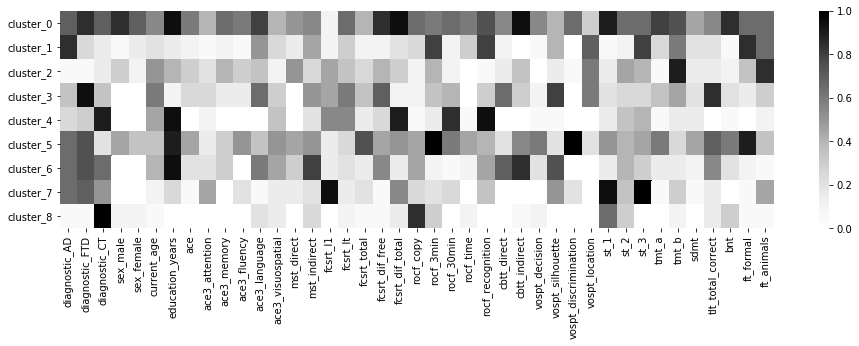

In [13]:
matplotlib.rcParams['figure.figsize'] = (16,4)
seaborn.heatmap(map_clusters,cmap='Greys',xticklabels=True,yticklabels=True)

### Conclusions

We can see that **grouping brain regions into clusters does not improve remarkably our predictions**. In fact, the results obtained are similar to those appearing in the best half of fine-grained prediction. What appears to be happening is that those regions which were best predicted compensate for those regions which were worst predicted. One advantage of doing the coarse-grained prediction with lobes was that differences in hypometabolism between lobes were not that pronounced. This does not happen with clusters, because similarly expressed regions tend to group together.

**In comparison with the prediction by lobes, we can see a clear improvement in f1 score but a slight worsening in accuracy**. This was expected and comes to show that grouping regions based on metabolic information makes more sense than doing so based on anatomical information.